In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.20/04


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/PreSelection/rootfiles/double_tag/DQ_250GeV_ss.PreSelec.root")


In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())
    
def Normal2(h1):
    h1.Scale(1.0/h1.Integral(12,88))

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_cnt_nevents', 'h_cnt_ISRevents', 'h_mc_qq_TotE', 'h_mc_qq_InvM', 'h_mc_ISR_TotE', 'h_pfo_visE', 'h_pfo_visE_all', 'h_pfo_gammaE', 'h_pfo_sigE', 'h_pfo_jet_mult', 'h_pfo_jet_ISR_mult', 'h_pfo_jet_NonISR_mult', 'h_pfo_phjet_E', 'h_pfo_phjet_ISR_E', 'h_pfo_phjet_NonISR_E', 'h_pfo_phjet_cos', 'h_pfo_phjet_ISR_cos', 'h_pfo_phjet_NonISR_cos', 'h_pfo_jet_TotE', 'h_pfo_jet_InvM']


## Invariant Mass

In [6]:
h_mc_qq_TotE   = file1.Get("h_mc_qq_TotE")
h_mc_qq_InvM   = file1.Get("h_mc_qq_InvM")
h_pfo_jet_InvM = file1.Get("h_pfo_jet_InvM")

makePretty(h_mc_qq_InvM,kBlack)
makePretty(h_pfo_jet_InvM,kGreen+2)

makePretty(h_mc_qq_TotE,kRed)
h_mc_qq_TotE.SetFillColor(0)
h_mc_qq_TotE.SetFillStyle(0)
h_mc_qq_TotE.SetLineStyle(7)

In [7]:
Normal(h_mc_qq_InvM)
Normal(h_pfo_jet_InvM)
Normal(h_mc_qq_TotE)

In [8]:
c0 = TCanvas("c0","c0",500,500)

In [9]:
h_mc_qq_TotE.GetXaxis().SetTitle("Invariant Mass (GeV)")
h_mc_qq_TotE.GetXaxis().SetRangeUser(50,300)

h_mc_qq_TotE.Draw("h")
h_mc_qq_InvM.Draw("hsame")
h_pfo_jet_InvM.Draw("hsame")

In [10]:
leg = TLegend(0.55,0.85,0.8,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_mc_qq_InvM,"QQ Inv. Mass","fp")
leg.AddEntry(h_pfo_jet_InvM,"Jet Inv. Mass","fp")
leg.AddEntry(h_mc_qq_TotE,"Total QQ Energy","fp")
leg.Draw()

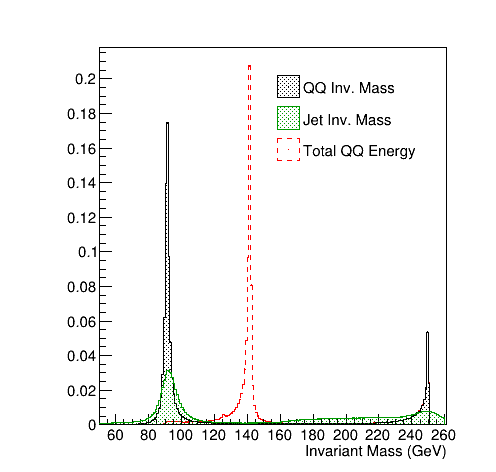

In [11]:
c0.Draw()

## Gamma E

In [12]:
h_mc_ISR_TotE = file1.Get("h_mc_ISR_TotE")
makePretty(h_mc_ISR_TotE,kBlack)

In [13]:
c1 = TCanvas("c1","c1",500,500)

In [14]:
h_mc_ISR_TotE.Draw("h")

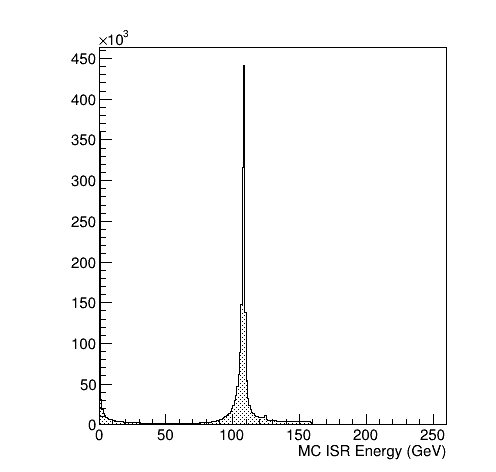

In [15]:
c1.Draw()

## Vis E

In [16]:
h_pfo_visE_all = file1.Get("h_pfo_visE_all")
h_pfo_visE     = file1.Get("h_pfo_visE")
h_pfo_gammaE   = file1.Get("h_pfo_gammaE")
h_pfo_sigE     = file1.Get("h_pfo_sigE")

makePretty(h_pfo_visE,kBlack)
makePretty(h_pfo_gammaE,kBlue)
makePretty(h_pfo_sigE,kGreen+2)

makePretty(h_pfo_visE_all,kRed)
h_pfo_visE_all.SetFillColor(0)
h_pfo_visE_all.SetFillStyle(0)
h_pfo_visE_all.SetLineStyle(7)

In [17]:
c2 = TCanvas("c2","c2",500,500)

In [18]:
h_pfo_visE.GetXaxis().SetTitle("Energy (GeV)")
h_pfo_visE.GetXaxis().SetRangeUser(50,300)

h_pfo_visE.Draw("h")
h_pfo_gammaE.Draw("hsame")
h_pfo_sigE.Draw("hsame")
h_pfo_visE_all.Draw("hsame")

In [19]:
leg = TLegend(0.55,0.85,0.8,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_visE,"Total Jet Energy","fp")
leg.AddEntry(h_pfo_gammaE,"Radiative Return","fp")
leg.AddEntry(h_pfo_sigE,"Signal","fp")
leg.AddEntry(h_pfo_visE_all,"All Visible Energy","fp")
leg.Draw()

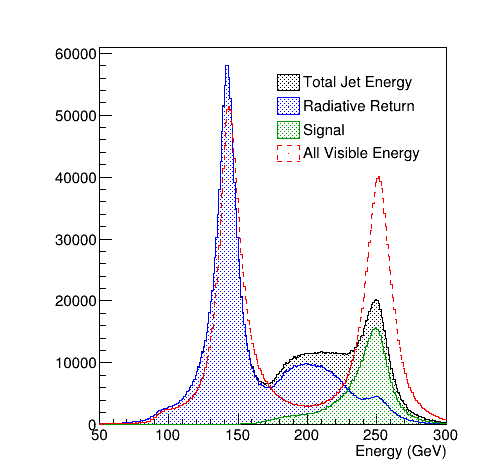

In [20]:
c2.Draw()

## Photon Jet Energy

In [21]:
h_pfo_phjet_E        = file1.Get("h_pfo_phjet_E")
h_pfo_phjet_ISR_E    = file1.Get("h_pfo_phjet_ISR_E")
h_pfo_phjet_NonISR_E = file1.Get("h_pfo_phjet_NonISR_E")

makePretty(h_pfo_phjet_E,kBlack)
makePretty(h_pfo_phjet_ISR_E,kBlue)
makePretty(h_pfo_phjet_NonISR_E,kGreen+2)

In [22]:
c3 = TCanvas("c3","c3",500,500)

In [23]:
h_pfo_phjet_E.GetXaxis().SetTitle("Photon Jet Energy (GeV)")
h_pfo_phjet_E.GetXaxis().SetRangeUser(0,150)

h_pfo_phjet_E.Draw("h")
h_pfo_phjet_ISR_E.Draw("hsame")
h_pfo_phjet_NonISR_E.Draw("hsame")

In [24]:
leg = TLegend(0.5,0.85,0.75,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_phjet_E,"Photon Jet Energy","fp")
leg.AddEntry(h_pfo_phjet_ISR_E,"Radiative Return","fp")
leg.AddEntry(h_pfo_phjet_NonISR_E,"Signal","fp")
leg.Draw()

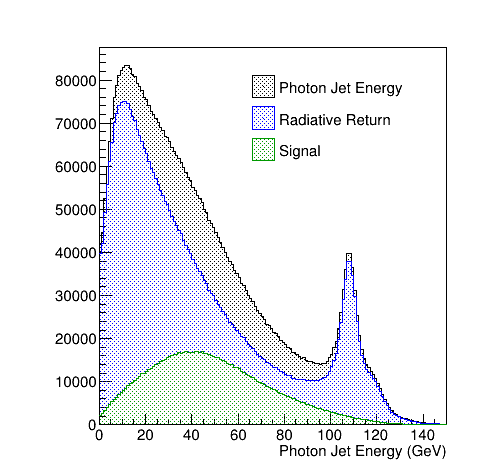

In [25]:
c3.Draw()

## Photon Jet Angle

In [26]:
h_pfo_phjet_cos        = file1.Get("h_pfo_phjet_cos")
h_pfo_phjet_ISR_cos    = file1.Get("h_pfo_phjet_ISR_cos")
h_pfo_phjet_NonISR_cos = file1.Get("h_pfo_phjet_NonISR_cos")

makePretty(h_pfo_phjet_cos,kBlack)
makePretty(h_pfo_phjet_ISR_cos,kBlue)
makePretty(h_pfo_phjet_NonISR_cos,kGreen+2)

In [27]:
Normal(h_pfo_phjet_cos)
Normal(h_pfo_phjet_ISR_cos)
Normal(h_pfo_phjet_NonISR_cos)

In [28]:
c4 = TCanvas("c4","c4",500,500)

In [35]:
h_pfo_phjet_cos.GetXaxis().SetTitle("Photon Jet |cos#theta|")
h_pfo_phjet_cos.GetYaxis().SetRangeUser(0,0.2)

h_pfo_phjet_cos.Draw("h")
h_pfo_phjet_ISR_cos.Draw("hsame")
h_pfo_phjet_NonISR_cos.Draw("hsame")

In [36]:
leg = TLegend(0.25,0.85,0.5,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_phjet_cos,"Photon Jet Angle","fp")
leg.AddEntry(h_pfo_phjet_ISR_cos,"Radiative Return","fp")
leg.AddEntry(h_pfo_phjet_NonISR_cos,"Signal","fp")
leg.Draw()

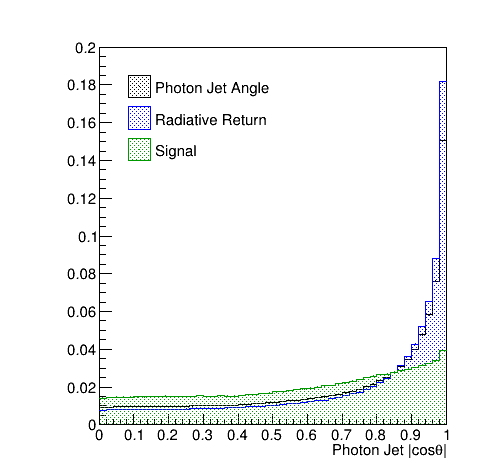

In [37]:
c4.Draw()

## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```